In [45]:
#!/usr/bin/python3

#Imports
import matplotlib.pyplot as plt
import pandas as pd
import os

In [46]:
# Load Lawful Permanent Residents 2020 Data Tables
# Data from: https://www.dhs.gov/immigration-statistics/yearbook/2020
directory = "./data/lawful2020/"

# Title: PERSONS OBTAINING LAWFUL PERMANENT RESIDENT STATUS: FISCAL YEARS 1820 TO 2020
lawful2020_table1_in = pd.read_excel(directory + "fy2020_table1.xlsx", skiprows=3, nrows=60)

# Reformat into 2 columns: Year and Number
lawful2020_table1 = pd.DataFrame(columns=['Year', 'Number'])
lawful2020_table1['Year'] = lawful2020_table1_in['Year']
lawful2020_table1['Number'] = lawful2020_table1_in['Number']
for i in range(3):
    temp = pd.DataFrame(columns=['Year','Number'])
    current_col_year = 'Year.' + str(i + 1)
    current_col_number = 'Number.' + str(i + 1)
    temp['Year'] = lawful2020_table1_in[current_col_year]
    temp['Number'] = lawful2020_table1_in[current_col_number]
    lawful2020_table1 = pd.concat([lawful2020_table1, temp])
    
# Remove rows with NaN
lawful2020_table1 = lawful2020_table1.dropna()

# Modify one instance of a string
lawful2020_table1.loc[lawful2020_table1['Year'] == "1976¹"] = 1976

print(lawful2020_table1.describe())

             Number
count  2.010000e+02
mean   4.288578e+05
std    3.651173e+05
min    1.976000e+03
25%    1.411320e+05
50%    3.216250e+05
75%    6.033220e+05
max    1.826595e+06


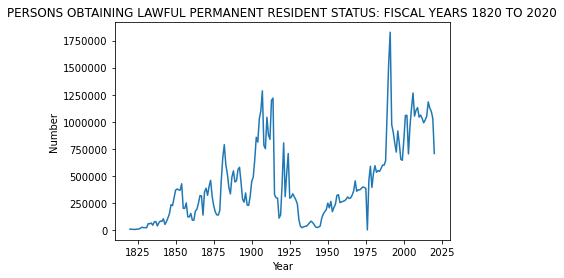

In [47]:
# Plot simple chart
plt.plot(lawful2020_table1['Year'], lawful2020_table1['Number'])
plt.xlabel("Year")
plt.ylabel("Number")
plt.title("PERSONS OBTAINING LAWFUL PERMANENT RESIDENT STATUS: FISCAL YEARS 1820 TO 2020")
plt.ticklabel_format(style='plain')
plt.show()

Here, we can see a general upward trend for persons obtaining lawful permanent resident status over the past 200 years in the United States.